## IMPORTS

In [137]:
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt
import numpy as np

Pose landmarks:  landmark {
  x: 0.47526747
  y: 0.22006726
  z: -0.55528164
  visibility: 0.999943
}
landmark {
  x: 0.49002647
  y: 0.18936718
  z: -0.5338485
  visibility: 0.99980766
}
landmark {
  x: 0.49936974
  y: 0.18935132
  z: -0.53413427
  visibility: 0.99988353
}
landmark {
  x: 0.50744
  y: 0.18967503
  z: -0.534259
  visibility: 0.99981743
}
landmark {
  x: 0.46629074
  y: 0.19122344
  z: -0.52156466
  visibility: 0.99974877
}
landmark {
  x: 0.45943394
  y: 0.19247371
  z: -0.521668
  visibility: 0.99981886
}
landmark {
  x: 0.45395175
  y: 0.19360948
  z: -0.52183074
  visibility: 0.99967515
}
landmark {
  x: 0.52310085
  y: 0.20482475
  z: -0.35496578
  visibility: 0.99993384
}
landmark {
  x: 0.4516097
  y: 0.20711607
  z: -0.29447928
  visibility: 0.9998306
}
landmark {
  x: 0.49531695
  y: 0.25282645
  z: -0.48694676
  visibility: 0.99994254
}
landmark {
  x: 0.46313894
  y: 0.25424755
  z: -0.4691494
  visibility: 0.99986327
}
landmark {
  x: 0.6044245
  y: 0.375722

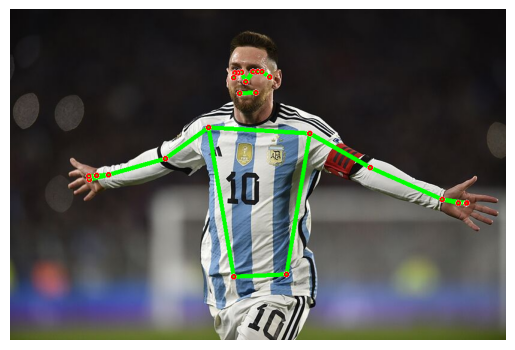

In [138]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

##Cambiar static_image_mode = False para aplicarlo a vídeo y no a imagenes
with mp_pose.Pose(
    static_image_mode=True) as pose:

    image = cv2.imread("image_0001.jpg")
    height, width, _ = image.shape
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = pose.process(image_rgb)
    print("Pose landmarks: ", results.pose_landmarks)

    if results.pose_landmarks is not None:
        mp_drawing.draw_landmarks(image_rgb, results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(255,0,0), thickness=2, circle_radius=3),
        mp_drawing.DrawingSpec(color=(0,255,0), thickness=6))
    
    plt.imshow(image_rgb)
    plt.axis('off')
    ##cv2.imshow("Image", image)
    ##cv2.waitKey(0)
    ##cv2.destroyAllWindows()


  

## BINARIZACIÓN

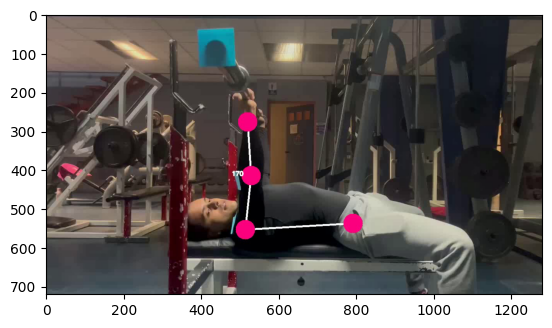

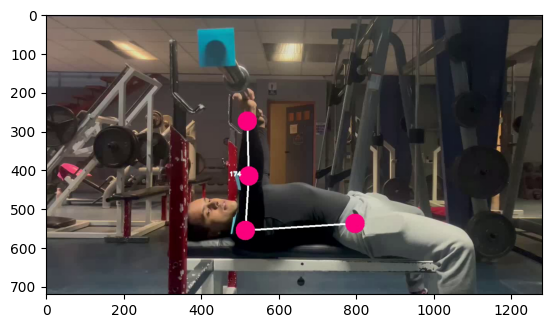

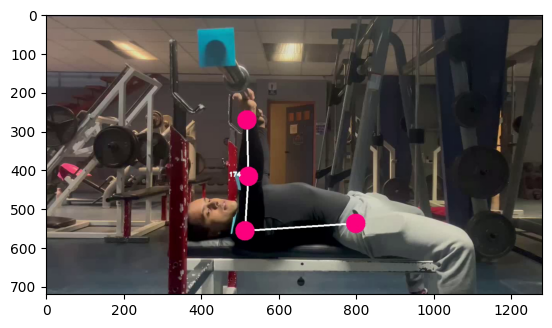

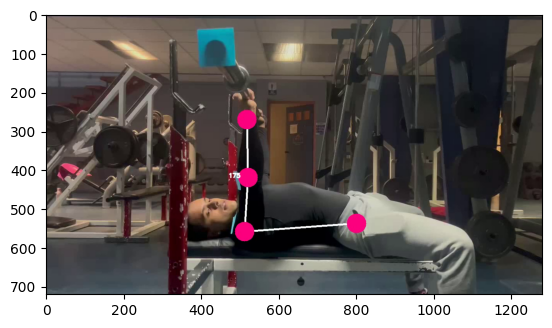

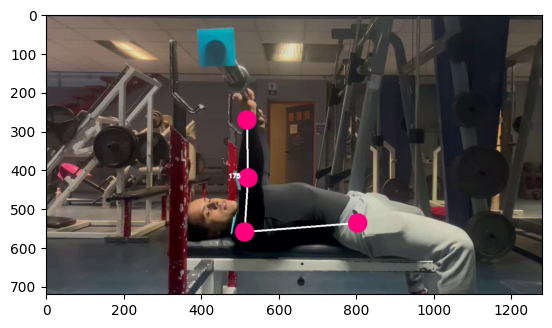

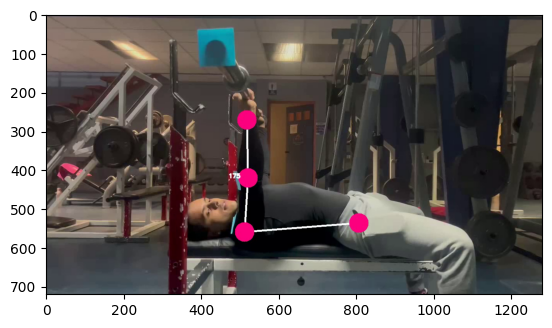

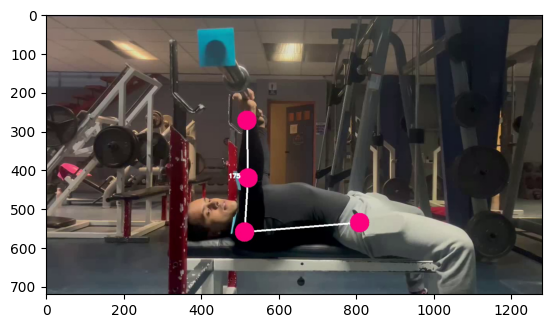

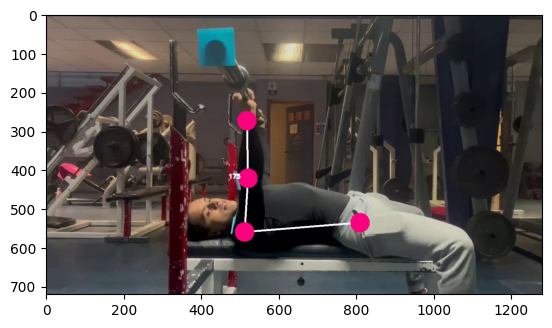

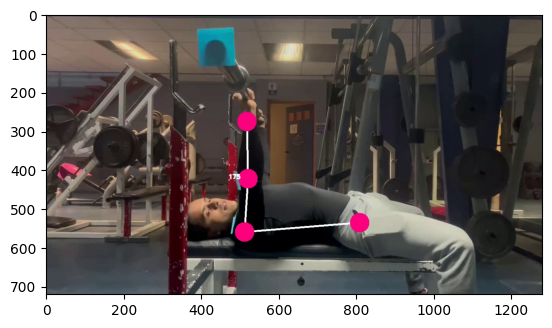

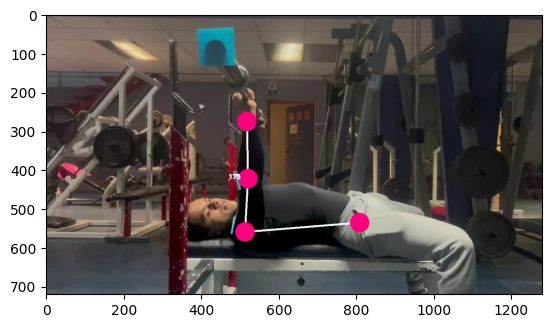

In [139]:
rebote_fondoruido = cv2.VideoCapture('./videos_results/resultadoPressDeBancaBuenaTecnica.avi', cv2.IMREAD_GRAYSCALE)

cont = 0
while True:
    ret, frame = rebote_fondoruido.read()
    
    if not ret:
        break
    
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    
    
    plt.imshow(frame)
    plt.pause(0.03)  
    cont += 1
    if cont >= 10:
        break

rebote_fondoruido.release()

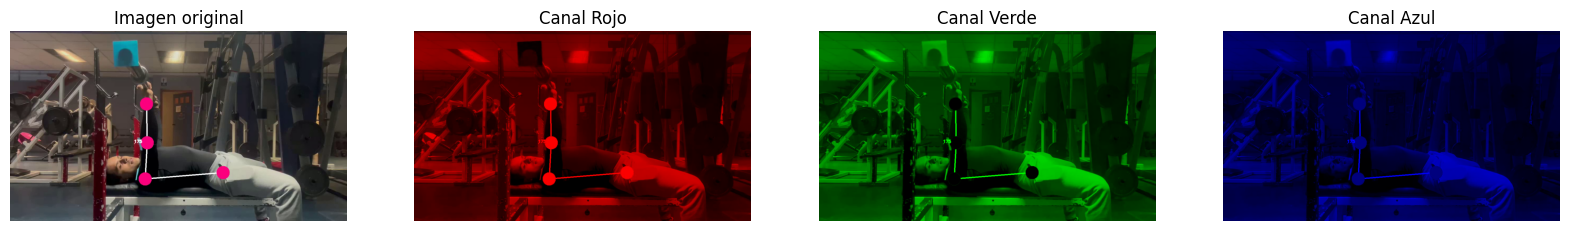

In [140]:
# Leer la imagen y convertirla a RGB

# Crear copias de la imagen para aislar cada canal
imageOutR = frame.copy()
imageOutG = frame.copy()
imageOutB = frame.copy()

# Aislar el canal R
imageOutR[:, :, 1] = 0  # Green
imageOutR[:, :, 2] = 0  # Blue :(dos puntos es todas :(filas), :(columnas), R || G || B (QUITAR CANAL))

# Aislar el canal G
imageOutG[:, :, 0] = 0  # R
imageOutG[:, :, 2] = 0  # B

# Aislar el canal B
imageOutB[:, :, 0] = 0  # R
imageOutB[:, :, 1] = 0  # G

# Visualizar las imágenes
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

#Aplica en la salida el aislamiendo del canal dependiendo la posición del arreglo, es decir con axis se aplican las dimensiones del arreglo
ax[0].imshow(frame)
ax[0].set_title("Imagen original")
ax[0].axis('off')

ax[1].imshow(imageOutR)
ax[1].set_title("Canal Rojo")
ax[1].axis('off')

ax[2].imshow(imageOutG)
ax[2].set_title("Canal Verde")
ax[2].axis('off')

ax[3].imshow(imageOutB)
ax[3].set_title("Canal Azul")
ax[3].axis('off')

plt.show()

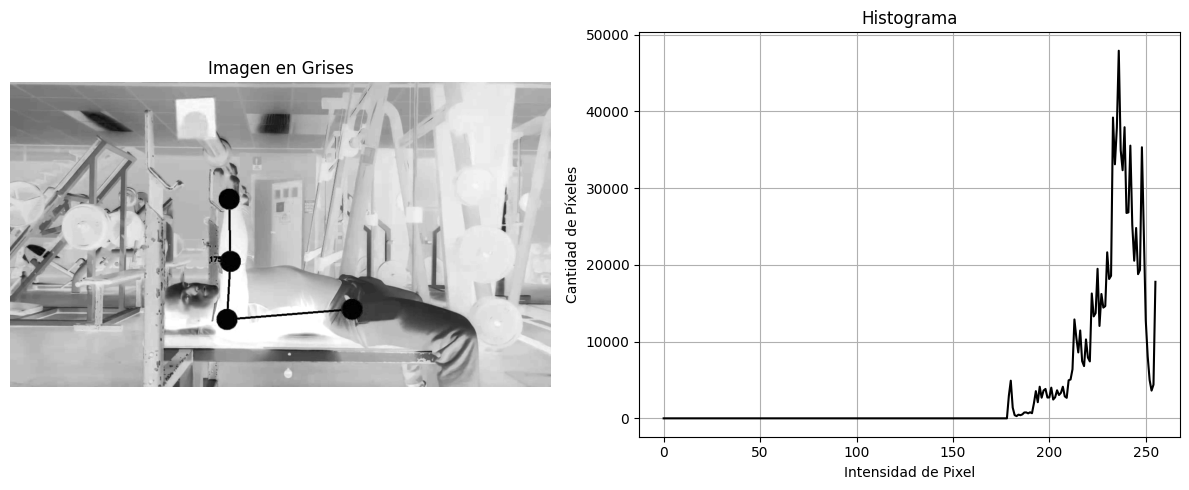

In [141]:
img = cv2.cvtColor(imageOutR, cv2.COLOR_RGB2GRAY)  
inverted_img = 255 - img
# Calcular el histograma
hist = cv2.calcHist([inverted_img], [0], None, [256], [0, 256])

# Visualizar la imagen y su histograma
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Mostrar la imagen en escala de grises
ax[0].imshow(inverted_img, cmap='gray')
ax[0].set_title("Imagen en Grises")
ax[0].axis('off')

# Mostrar el histograma
ax[1].plot(hist, color='black')
ax[1].set_title("Histograma")
ax[1].set_xlabel("Intensidad de Pixel")
ax[1].set_ylabel("Cantidad de Píxeles")
ax[1].grid(True)

#Su propósito principal es ajustar automáticamente los márgenes y espacios entre subtramas o elementos en un gráfico.
plt.tight_layout()

plt.show()

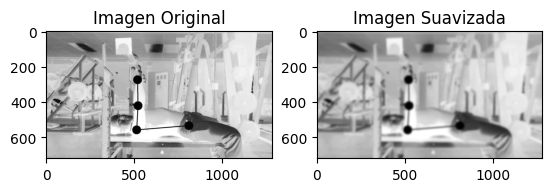

In [142]:
blurred = cv2.GaussianBlur(inverted_img, (31, 31), 0)
plt.subplot(1, 2, 1)
plt.imshow(inverted_img, cmap='gray')
plt.title('Imagen Original')
plt.subplot(1, 2, 2)
plt.imshow(blurred, cmap='gray')
plt.title('Imagen Suavizada')
plt.show()

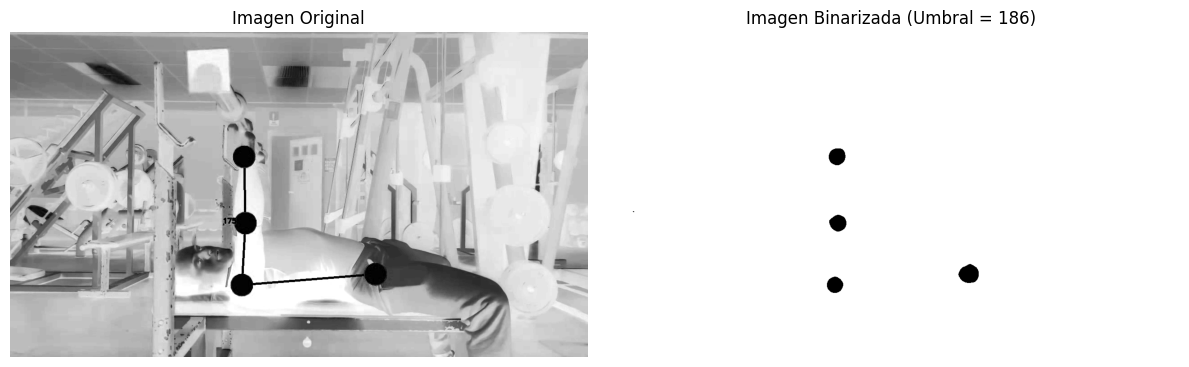

In [143]:
# Puedes cambiar este valor según tus necesidades
umbral = 186  

# Binarizar la imagen
_, img_binarizada = cv2.threshold(blurred, umbral, 255, cv2.THRESH_BINARY)

# Visualizar la imagen original y la imagen binarizada
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Mostrar la imagen en escala de grises
ax[0].imshow(inverted_img, cmap='gray')
ax[0].set_title("Imagen Original")
ax[0].axis('off')

# Mostrar la imagen binarizada
ax[1].imshow(img_binarizada, cmap='gray')
ax[1].set_title(f"Imagen Binarizada (Umbral = {umbral})")
ax[1].axis('off')

#Su propósito principal es ajustar automáticamente los márgenes y espacios entre subtramas o elementos en un gráfico.
plt.tight_layout()

plt.show()

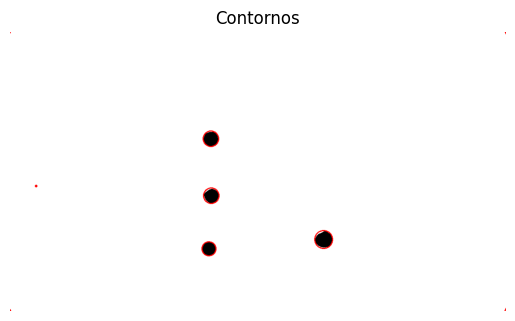

In [148]:
kernel = np.ones((3,3), np.uint8)

# Erosión para eliminar pequeños ruidos
erosion = cv2.erode(img_binarizada, kernel, iterations=6)

# Dilatación para restaurar el objeto erosionado a su tamaño original
dilatacion = cv2.dilate(erosion, kernel, iterations=6)

# Encuentra los contornos en la imagen procesada
contornos, hierarchy = cv2.findContours(dilatacion, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Convertir la imagen procesada a color para dibujar en rojo
imagen_con_contornos = cv2.cvtColor(dilatacion, cv2.COLOR_GRAY2RGB)

for contorno in contornos:
    # Encuentra el círculo que encierra el contorno
    (x, y), radio = cv2.minEnclosingCircle(contorno)
    centro = (int(x), int(y))
    radio = int(radio)
    cv2.circle(imagen_con_contornos, centro, radio, (255, 0, 0), 2)  # Dibuja el círculo en rojo

# Muestra la imagen con los contornos
plt.imshow(imagen_con_contornos)
plt.title("Contornos")
plt.axis('off')  # Esto es para eliminar los ejes de coordenadas
plt.show()
